# Importing The Packages

In [1]:
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import re
import spacy
from nltk.corpus import sentiwordnet as swn
from IPython.display import clear_output
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly
plotly.offline.init_notebook_mode (connected = True)

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


# Importing The Data

In [6]:
data=pd.read_csv('movie_data.csv')

In [7]:
data.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Making two copies of Reviews to edit

In [8]:
# Replacing Positive -> 1 and Negative -> 0

data.replace({"positive":1,"negative":0},inplace=True)

In [9]:
#Edits After Removing Stopwords
Edited_Review = data['review'].copy()
data['Review_without_stopwords'] = Edited_Review

# Having a look at 1st five reviews in the data

In [10]:
data.head(5)

,review,sentiment,Review_without_stopwords
0,One of the other reviewers has mentioned that ...,1,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...,1,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,0,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,"Petter Mattei's ""Love in the Time of Money"" is..."


# Preprocessing The Data

In [11]:
# Function to preprocess Reviews data
def preprocess_Reviews_data(data,name):
    # Proprocessing the data
    data[name]=data[name].str.lower()
    # Code to remove the Hashtags from the text
    data[name]=data[name].apply(lambda x:re.sub(r'\B#\S+','',x))
    # Code to remove the links from the text
    data[name]=data[name].apply(lambda x:re.sub(r"http\S+", "", x))
    # Code to remove the Special characters from the text 
    data[name]=data[name].apply(lambda x:' '.join(re.findall(r'\w+', x)))
    # Code to substitute the multiple spaces with single spaces
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
    # Code to remove all the single characters in the text
    data[name]=data[name].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
    # Remove the twitter handlers
    data[name]=data[name].apply(lambda x:re.sub('@[^\s]+','',x))

# Function to tokenize and remove the stopwords    
def rem_stopwords_tokenize(data,name):
      
    def getting(sen):
        example_sent = sen
        
        filtered_sentence = [] 

        stop_words = set(stopwords.words('english')) 

        word_tokens = word_tokenize(example_sent) 
        
        filtered_sentence = [w for w in word_tokens if not w in stop_words] 
        
        return filtered_sentence
    # Using "getting(sen)" function to append edited sentence to data
    x=[]
    for i in data[name].values:
        x.append(getting(i))
    data[name]=x


# Lemmatization Function

In [12]:
lemmatizer = WordNetLemmatizer()
def Lemmatization(data,name):
    def getting2(sen):
        
        example = sen
        output_sentence =[]
        word_tokens2 = word_tokenize(example)
        lemmatized_output = [lemmatizer.lemmatize(w) for w in word_tokens2]
        
        # Remove characters which have length less than 2  
        without_single_chr = [word for word in lemmatized_output if len(word) > 2]
        # Remove numbers
        cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]
        
        return cleaned_data_title
    # Using "getting2(sen)" function to append edited sentence to data
    x=[]
    for i in data[name].values:
        x.append(getting2(i))
    data[name]=x

# Converting all the texts back to sentences

In [13]:
def make_sentences(data,name):
    data[name]=data[name].apply(lambda x:' '.join([i+' ' for i in x]))
    # Removing double spaces if created
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [14]:
# Using the preprocessing function to preprocess the hotel data
preprocess_Reviews_data(data,'Review_without_stopwords')
# Using tokenizer and removing the stopwords
rem_stopwords_tokenize(data,'Review_without_stopwords')
# Converting all the texts back to sentences
make_sentences(data,'Review_without_stopwords')

#Edits After Lemmatization
final_Edit = data['Review_without_stopwords'].copy()
data["After_lemmatization"] = final_Edit

# Using the Lemmatization function to lemmatize the hotel data
Lemmatization(data,'After_lemmatization')
# Converting all the texts back to sentences
make_sentences(data,'After_lemmatization')

# Results of Preprocessing data (Removing stopwords & Lemmatization)

In [15]:
data.head(6)

,review,sentiment,Review_without_stopwords,After_lemmatization
0,One of the other reviewers has mentioned that ...,1,one reviewers mentioned watching 1 oz episode ...,one reviewer mentioned watching episode hooked...
1,A wonderful little production. <br /><br />The...,1,wonderful little production br br filming tech...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought waswonderful way spend time ontoo hot ...,thought waswonderful way spend time ontoo hot ...
3,Basically there's a family where a little boy ...,0,basically therea family wherelittle boy jake t...,basically therea family wherelittle boy jake t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter matteilove time money isvisually stunni...,petter matteilove time money isvisually stunni...
5,"Probably my all-time favorite movie, a story o...",1,probably time favorite moviestory selflessness...,probably time favorite moviestory selflessness...


So when we are working with sentiwordnet we need to know the characterstic of the word for which we want to know the sentiment . So for finding that position of the word here we are gonna use nltk which tells us about the position of the word which then is used to get the sentiment using the sentiwordnet . We then average out the score for both the positive and the negative score from the whole sentence .
The positions compatible with the sentiwordnet are:
* n - NOUN
* v - VERB
* a - ADJECTIVE
* s - ADJECTIVE SATELLITE
* r - ADVERB

In [16]:
import nltk
import ssl
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [17]:
pos=neg=obj=count=0

postagging = []

for review in data['After_lemmatization']:
    list = word_tokenize(review)
    postagging.append(nltk.pos_tag(list))

data['pos_tags'] = postagging

def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None


# Returns list of pos-neg and objective score. But returns empty list if not present in senti wordnet.
def get_sentiment(word,tag):
    wn_tag = penn_to_wn(tag)
    
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []

    #Lemmatization
    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []

    #Synset is a special kind of a simple interface that is present in NLTK to look up words in WordNet. 
    #Synset instances are the groupings of synonymous words that express the same concept. 
    #Some of the words have only one Synset and some have several.
    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

    pos=neg=obj=count=0
    
    ###################################################################################
senti_score = []

for pos_val in data['pos_tags']:
    senti_val = [get_sentiment(x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  #positive score is stored at 2nd position
            neg = neg + score[2]  #negative score is stored at 3rd position
        except:
            continue
    senti_score.append(pos - neg)
    pos=neg=0    
    
data['senti_score'] = senti_score
print(data['senti_score'])

print(data.head)

0       -2.125
1        5.000
2        0.250
3        1.750
4        6.625
5        3.000
6        0.250
7        1.375
8        1.125
9        1.250
10       2.250
11      -0.750
12       2.625
13      -0.625
14       0.875
15      -0.375
16       0.750
17      -0.625
18      -0.625
19       2.125
20      -0.750
21      -1.000
22       1.500
23      -3.125
24      -0.625
25      -0.750
26      -0.375
27      -1.125
28      -2.375
29      -4.750
         ...  
49970   -1.500
49971   -0.125
49972   -1.612
49973    3.375
49974    0.625
49975   -0.625
49976    1.250
49977    0.375
49978   -0.375
49979    0.875
49980    1.625
49981    5.625
49982    0.500
49983    3.125
49984    0.750
49985    3.375
49986    2.250
49987    1.375
49988    3.125
49989    0.375
49990   -2.125
49991    1.250
49992   -2.750
49993    3.375
49994   -3.147
49995    0.125
49996   -0.500
49997   -2.500
49998   -4.375
49999    0.750
Name: senti_score, Length: 50000, dtype: float64
<bound method NDFrame.head of       

In [22]:
overall=[]
for i in range(len(data)):
    if data['senti_score'][i]>= 0.05:
        overall.append('Positive')
    elif data['senti_score'][i]<= -0.05:
        overall.append('Negative')
    else:
        overall.append('Neutral')
data['Overall Sentiment']=overall

In [23]:
data.head(10)

,review,sentiment,Review_without_stopwords,After_lemmatization,pos_tags,senti_score,Overall Sentiment,reviews_text_new
0,One of the other reviewers has mentioned that ...,1,one reviewers mentioned watching 1 oz episode ...,one reviewer mentioned watching episode hooked...,"[(one, CD), (reviewer, NN), (mentioned, VBD), ...",-2.125,Negative,one reviewer mentioned watching episode hooked...
1,A wonderful little production. <br /><br />The...,1,wonderful little production br br filming tech...,wonderful little production filming technique ...,"[(wonderful, JJ), (little, JJ), (production, N...",5.000,Positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought waswonderful way spend time ontoo hot ...,thought waswonderful way spend time ontoo hot ...,"[(thought, VBN), (waswonderful, JJ), (way, NN)...",0.250,Positive,thought waswonderful way spend time ontoo hot ...
3,Basically there's a family where a little boy ...,0,basically therea family wherelittle boy jake t...,basically therea family wherelittle boy jake t...,"[(basically, RB), (therea, JJ), (family, NN), ...",1.750,Positive,basically therea family wherelittle boy jake t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter matteilove time money isvisually stunni...,petter matteilove time money isvisually stunni...,"[(petter, NN), (matteilove, NN), (time, NN), (...",6.625,Positive,petter matteilove time money isvisually stunni...
5,"Probably my all-time favorite movie, a story o...",1,probably time favorite moviestory selflessness...,probably time favorite moviestory selflessness...,"[(probably, RB), (time, NN), (favorite, JJ), (...",3.000,Positive,probably time favorite moviestory selflessness...
6,I sure would like to see a resurrection of a u...,1,sure would like seeresurrection ofup dated sea...,sure would like seeresurrection ofup dated sea...,"[(sure, RB), (would, MD), (like, VB), (seeresu...",0.250,Positive,sure would like seeresurrection ofup dated sea...
7,"This show was an amazing, fresh & innovative i...",0,show amazing fresh innovative idea 70when firs...,show amazing fresh innovative idea 70when firs...,"[(show, NN), (amazing, JJ), (fresh, JJ), (inno...",1.375,Positive,show amazing fresh innovative idea 70when firs...
8,Encouraged by the positive comments about this...,0,encouraged positive comments film herewas look...,encouraged positive comment film herewas looki...,"[(encouraged, VBN), (positive, JJ), (comment, ...",1.125,Positive,encouraged positive comment film herewas looki...
9,If you like original gut wrenching laughter yo...,1,like original gut wrenching laughter like movi...,like original gut wrenching laughter like movi...,"[(like, IN), (original, JJ), (gut, NN), (wrenc...",1.250,Positive,like original gut wrenching laughter like movi...


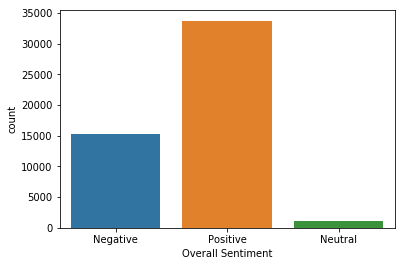

In [24]:
import seaborn as sns
sns.countplot(data['Overall Sentiment'])

In [25]:
data['reviews_text_new'] = data['After_lemmatization'].copy()

# Building a machine learning model

# Bag-of-words

In [27]:
# The following code creates a word-document matrix.
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(data['reviews_text_new'])
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head(3)

MemoryError: Unable to allocate 134. GiB for an array with shape (50000, 359320) and data type int64

In [ ]:
vect = CountVectorizer()
vect.fit(data['reviews_text_new'])
vect.get_feature_names()
# transform training data into a 'document-term matrix'
simple_train_dtm = vect.transform(data['reviews_text_new'])
print(simple_train_dtm)

In [17]:
### Creating a python object of the class CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
bow_counts = CountVectorizer(tokenizer= word_tokenize, # type of tokenization
                             ngram_range=(1,3)) # number of n-grams

bow_data = bow_counts.fit_transform(data['reviews_text_new'])

# Divide into training and test sets

In [18]:
from sklearn.model_selection import train_test_split
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data, # Features
                                                                    data['Overall Sentiment'], # Target variable
                                                                    test_size = 0.2, # 20% test size
                                                                    random_state = 0) # random

# Applying logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression
### Training the model 
lr_model_all = LogisticRegression() # Logistic regression
lr_model_all.fit(X_train_bow, y_train_bow) # Fitting a logistic regression model

## Predicting the output
test_pred_lr_all = lr_model_all.predict(X_test_bow) # Class prediction


## Calculate key performance metrics

from sklearn.metrics import classification_report
# Print a classification report
print(classification_report(y_test_bow,test_pred_lr_all))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

    Negative       0.82      0.73      0.77      2955
     Neutral       0.75      0.01      0.03       213
    Positive       0.87      0.94      0.91      6832

    accuracy                           0.86     10000
   macro avg       0.81      0.56      0.57     10000
weighted avg       0.85      0.86      0.85     10000



# TF-IDF model

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
noise_words = []
### Creating a python object of the class CountVectorizer
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
                               stop_words=noise_words, # List of stopwords
                               ngram_range=(1,1)) # number of n-grams

tfidf_data = tfidf_counts.fit_transform(data['reviews_text_new'])

In [21]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
                                                                            data['Overall Sentiment'],
                                                                            test_size = 0.2,
                                                                            random_state = 0)

In [22]:
### Setting up the model class
lr_model_tf_idf = LogisticRegression()

## Training the model 
lr_model_tf_idf.fit(X_train_tfidf,y_train_tfidf)

## Prediciting the results
test_pred_lr_all = lr_model_tf_idf.predict(X_test_tfidf)

## Calculate key performance metrics


# Print a classification report
print(classification_report(y_test_tfidf,test_pred_lr_all))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

    Negative       0.84      0.67      0.75      2955
     Neutral       0.00      0.00      0.00       213
    Positive       0.85      0.95      0.90      6832

    accuracy                           0.85     10000
   macro avg       0.56      0.54      0.55     10000
weighted avg       0.83      0.85      0.84     10000

